# Predicting the Win Percentage of an NBA team



Name: Suhas Venkatesan

## Outline:




  1.   Introduction

      * 1.1. Background Information
      * 1.2. Libraries Used


2.   Data Collection
3.   Data Analysis and Visualization
4.   Machine Learning
      * 4.1. Dataset Normalization
      * 4.2. Splitting Data
      * 4.3. Model Building and Training
        * 4.3.1. Multiple Linear Regression
        * 4.3.2. Random Forest Regression
5.   Conclusion






## 1. Introduction

In this project, I want to analyze a large set of NBA team data in order to successfully build a model to predict an NBA team's win percentage during a particular NBA season.

### 1.1 Background Information

The NBA makes 8.3 billion dollars in revenue every year. The ultimate goal for every team is to win the coveted NBA championship in June, but the first step to making this happen is maximizing the number of wins in the regular season. Only 8 teams from each of the two conferences are allowed to compete in the playoffs every year, and the teams with more wins receive higher playoff seeds, meaning that they have home court advantage in more matchups and an easier path to the finals. The more wins a team achieves in the regular season, the more likely they will be to receive exclusive sponsorships, contracts, and ticket sales in the next year. To know more about how wins in the NBA work, you can take a quick look at https://basketballnoise.com/how-do-standings-work-in-the-nba/. 

The modern NBA is heavily dependent on data analytics, and as a huge NBA fan myself, I wanted to see if there was a way to predict a team's win percentage using data science. This data is difficult to access and there have not been many projects done on this topic. It is a very valuable topic, as sports analysts and sports bettors alike need accurate analytics models to predict exactly how many games a team will win at the end of the season given their current statistics.




### 1.2: Libraries Used
I will be using these libraries in my code:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


## 2. Data Collection



To collect the data, I made a custom scraper which scrapes statistics from https://www.basketball-reference.com/ , a well known basketball statistics site. I used code from an existing scraper at https://github.com/vishaalagartha/basketball_reference_scraper/blob/master/API.md, and modified it to scrape team statistics for every year from 1980 until 2019. The source code for the scrapers is included in my Github repo, at https://github.com/Suhas-Venkatesan/Suhas-Venkatesan.github.io/blob/main/MyNBAScraper.py. I will be looking at all NBA team data from 1980 to 2019. The team data itself is accessible at https://github.com/Suhas-Venkatesan/Suhas-Venkatesan.github.io/blob/main/nbateamdata.csv.



In [ ]:
df = pd.read_csv('nbateamdata.csv')
df.head()

,Unnamed: 0,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TEAM,SEASON,AGE,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,PACE,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DRB%,ARENA,ATTENDANCE,ATTENDANCE/G
0,0,82,242.4,43.6,95.1,0.458,0.9,2.9,0.307,42.7,92.2,0.463,18.9,25.0,0.758,16.3,33.2,49.5,26.8,6.5,5.4,16.8,23.1,107.0,WAS,1979-80,29.0,39.0,43.0,34,48,-2.55,0.28,-2.27,103.2,105.7,-2.5,102.6,0.263,0.031,0.504,0.463,13.7,33.3,0.199,69.5,Capital Centre,NaN,9518.0
1,0,82,241.2,43.3,91.7,0.472,0.8,2.9,0.270,42.5,88.7,0.479,18.3,25.3,0.723,14.1,30.9,45.0,26.2,7.8,4.8,17.3,23.1,105.6,WAS,1980-81,28.6,39.0,43.0,41,41,0.01,0.41,0.42,102.7,102.7,0.0,102.4,0.276,0.032,0.514,0.476,14.4,30.5,0.199,67.8,Capital Centre,377238.0,NaN
2,0,82,241.8,41.5,87.4,0.474,0.7,2.9,0.250,40.7,84.5,0.482,19.8,25.7,0.772,12.8,31.5,44.3,24.2,7.8,4.8,17.0,25.3,103.5,WAS,1981-82,26.0,43.0,39.0,43,39,0.88,0.19,1.06,103.3,102.5,0.8,99.4,0.294,0.033,0.524,0.478,14.7,29.4,0.227,69.9,Capital Centre,379891.0,NaN
3,0,82,241.5,40.3,86.1,0.468,0.9,2.9,0.295,39.5,83.2,0.474,17.7,25.1,0.705,13.4,29.6,43.0,25.0,8.9,4.9,19.4,23.9,99.2,WAS,1982-83,25.8,42.0,40.0,41,41,-0.13,0.33,0.20,99.1,99.3,-0.2,99.4,0.292,0.034,0.511,0.473,16.6,30.4,0.206,68.6,Capital Centre,368281.0,NaN
4,0,82,242.7,40.8,84.2,0.484,0.9,3.4,0.252,39.9,80.8,0.494,20.3,26.8,0.756,12.5,29.1,41.6,26.7,6.8,3.9,17.7,24.3,102.7,WAS,1983-84,26.2,35.0,47.0,33,49,-2.89,0.53,-2.36,104.2,107.2,-3.0,97.4,0.319,0.041,0.535,0.489,15.5,30.1,0.241,69.7,Capital Centre,317447.0,7373.0


This data is absolutely amazing, with over 50 different features. There are a variety of abbreviations here, and the meaning of these abbreviations may be confusing to non NBA fans. However, every single NBA statistic abbreviation can be found in this glossary, along with its name and definition. https://www.nba.com/stats/help/glossary/ 

The main feature we are trying to predict is the Win/Loss percentage of each team. Since there are typically 82 games in an NBA season, the number of wins alone would normally suffice. However, there are a few seasons in between where the total number of games is not 82. One example is the NBA lockout in 2011 where there were much fewer games during the 2011-12 season. As a result, in order to normalize this, we must look at win percentage, which needs to be added as a feature, and is the percentage of total games which were wins.

In [ ]:
df['Win Percentage'] = df['W']/ (df['W'] + df['L'])

Something else that is important is to remove any features that are either completely irrelevant or too obvious to use to predict win percentage. We can remove games played, wins, and losses because these numbers are already factored into the win percentage calculation. PW and PL refer to pythagorean wins and losses, which are win and loss predictions for a particular team based on a sports analytics formula developed by Bill James, a baseball statistician. These prediction numbers correlate very highly with the actual number of wins and losses for a team so its a good idea to remove them. We should also take out attendance and attendance per game because they have a lot of null values. I do not believe it is worth filling these null values in because attendance per game is very difficult to estimate. Arena is also irrelevant here because it basically just corresponds to the team name. 



In [ ]:
df = df.drop(columns = ['G', 'W', 'L', 'PW', 'PL', 'ARENA', 'ATTENDANCE', 'ATTENDANCE/G'])
df.describe(include='all')

,Unnamed: 0,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TEAM,SEASON,AGE,MOV,SOS,SRS,ORtg,DRtg,NRtg,PACE,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DRB%,Win Percentage
count,1093.0,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.00000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093,1093,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOS,2011-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.0,241.704209,38.753888,83.801006,0.462020,4.962672,14.142543,0.332467,33.794145,69.658371,0.48521,19.479963,25.829186,0.754431,12.419030,30.285270,42.702013,23.073285,8.061757,5.076304,15.522141,22.305764,101.952699,NaN,NaN,26.891583,0.062909,-0.002278,0.060714,106.557914,106.479597,0.078317,94.957274,0.308683,0.170654,0.535565,0.491984,14.005306,29.064318,0.232747,70.926990,0.502254
std,0.0,0.840308,3.287522,4.633517,0.021385,3.068581,8.233162,0.047525,5.344750,10.477589,0.02212,2.565664,3.271108,0.029014,1.966227,2.093924,2.102836,2.625586,1.092684,0.959203,1.826264,2.317775,6.993947,NaN,NaN,1.646158,4.601986,0.402776,4.439125,3.789832,3.517715,4.821289,4.919152,0.038671,0.098043,0.020343,0.021560,1.239856,4.070303,0.029728,3.767177,0.153511
min,0.0,240.000000,30.800000,71.200000,0.401000,0.100000,0.900000,0.104000,23.100000,41.900000,0.42100,12.200000,16.600000,0.660000,7.600000,24.900000,35.600000,15.600000,5.500000,2.400000,11.200000,16.600000,81.900000,NaN,NaN,22.700000,-15.200000,-1.030000,-14.680000,92.200000,94.100000,-15.200000,82.300000,0.194000,0.011000,0.468000,0.424000,10.700000,18.000000,0.143000,61.500000,0.106061
25%,0.0,241.200000,36.300000,80.500000,0.447000,2.400000,7.400000,0.319000,29.900000,62.000000,0.47100,17.600000,23.500000,0.737000,11.000000,28.900000,41.200000,21.100000,7.300000,4.400000,14.200000,20.600000,96.800000,NaN,NaN,25.700000,-3.100000,-0.300000,-3.070000,104.000000,104.100000,-3.300000,91.200000,0.282000,0.086000,0.522000,0.477000,13.200000,26.100000,0.212000,67.900000,0.390244
50%,0.0,241.500000,38.300000,83.500000,0.461000,5.000000,14.200000,0.346000,31.800000,66.400000,0.48500,19.200000,25.700000,0.756000,12.300000,30.000000,42.700000,22.800000,8.000000,5.000000,15.200000,22.200000,101.400000,NaN,NaN,26.700000,0.330000,-0.010000,0.240000,106.400000,106.700000,0.300000,94.200000,0.307000,0.177000,0.535000,0.491000,13.900000,29.200000,0.231000,70.900000,0.512195
75%,0.0,242.100000,41.100000,87.100000,0.476000,6.900000,19.300000,0.363000,38.500000,79.000000,0.49900,21.200000,28.100000,0.773000,13.800000,31.500000,44.200000,24.900000,8.700000,5.600000,16.500000,23.900000,106.700000,NaN,NaN,28.000000,3.450000,0.300000,3.270000,109.200000,109.000000,3.600000,98.500000,0.336000,0.238000,0.548000,0.505000,14.800000,32.000000,0.253000,73.700000,0.620000


In [ ]:
df.head()

,Unnamed: 0,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TEAM,SEASON,AGE,MOV,SOS,SRS,ORtg,DRtg,NRtg,PACE,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,DRB%,Win Percentage
0,0,242.4,43.6,95.1,0.458,0.9,2.9,0.307,42.7,92.2,0.463,18.9,25.0,0.758,16.3,33.2,49.5,26.8,6.5,5.4,16.8,23.1,107.0,WAS,1979-80,29.0,-2.55,0.28,-2.27,103.2,105.7,-2.5,102.6,0.263,0.031,0.504,0.463,13.7,33.3,0.199,69.5,0.475610
1,0,241.2,43.3,91.7,0.472,0.8,2.9,0.270,42.5,88.7,0.479,18.3,25.3,0.723,14.1,30.9,45.0,26.2,7.8,4.8,17.3,23.1,105.6,WAS,1980-81,28.6,0.01,0.41,0.42,102.7,102.7,0.0,102.4,0.276,0.032,0.514,0.476,14.4,30.5,0.199,67.8,0.475610
2,0,241.8,41.5,87.4,0.474,0.7,2.9,0.250,40.7,84.5,0.482,19.8,25.7,0.772,12.8,31.5,44.3,24.2,7.8,4.8,17.0,25.3,103.5,WAS,1981-82,26.0,0.88,0.19,1.06,103.3,102.5,0.8,99.4,0.294,0.033,0.524,0.478,14.7,29.4,0.227,69.9,0.524390
3,0,241.5,40.3,86.1,0.468,0.9,2.9,0.295,39.5,83.2,0.474,17.7,25.1,0.705,13.4,29.6,43.0,25.0,8.9,4.9,19.4,23.9,99.2,WAS,1982-83,25.8,-0.13,0.33,0.20,99.1,99.3,-0.2,99.4,0.292,0.034,0.511,0.473,16.6,30.4,0.206,68.6,0.512195
4,0,242.7,40.8,84.2,0.484,0.9,3.4,0.252,39.9,80.8,0.494,20.3,26.8,0.756,12.5,29.1,41.6,26.7,6.8,3.9,17.7,24.3,102.7,WAS,1983-84,26.2,-2.89,0.53,-2.36,104.2,107.2,-3.0,97.4,0.319,0.041,0.535,0.489,15.5,30.1,0.241,69.7,0.426829


# 3. Data Analysis and Visualization

With such a wealth of features it is important that we engage in exploratory data analysis. We should first start with a correlation heatmap of all the features at once.




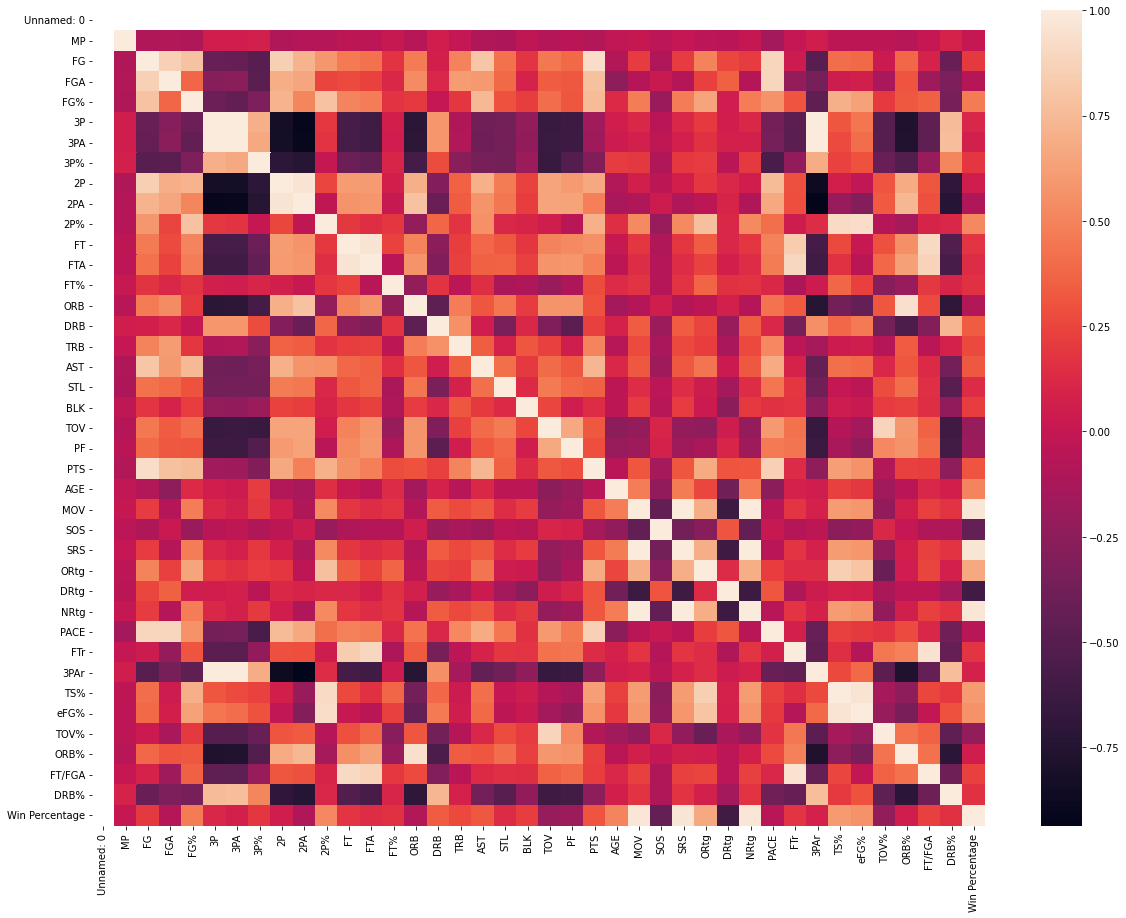

In [ ]:
plt.figure(figsize=(20,15))
dataplot= sb.heatmap(df.corr())
plt.show()

If we look at what is correlated with win percentage, we can see that some things like MOV (average margin of victory), SRS (a rating which factors in the strength of the schedule and average margin of victory), and NRtg (net rating, a statistic which takes into account the offensive and defensive rating) are some statistics which are positively correlated with win percentage almost completely, at 1.0. This makes sense because these statistics generally measure how strong the team is overall, which would lead to the team winning more games.

On the opposite end, Drtg (defensive rating) and SOS (strength of schedule) are almost completely correlated negatively with percentage at around -1. This makes sense for defensive rating, because the lower a defensive rating is, the better the team is at defense. 

However, I am very surprised by the strength of schedule correlation. The heatmap shows that the easier a team's schedule is (meaning that the teams they play against are weaker), the higher their win percentage. However, many great teams over the past decade such as the Golden State Warriors play in competitive divisions in the West where they have some of the toughest schedules in the league, and some sub par teams like the Orlando Magic generally have easier schedules. Despite this, Orlando almost always has a losing record while Golden State usually has the highest win percentages in the NBA. This is a very interesting finding. 

Next, we will make histograms to investigate the distribution of each feature. 

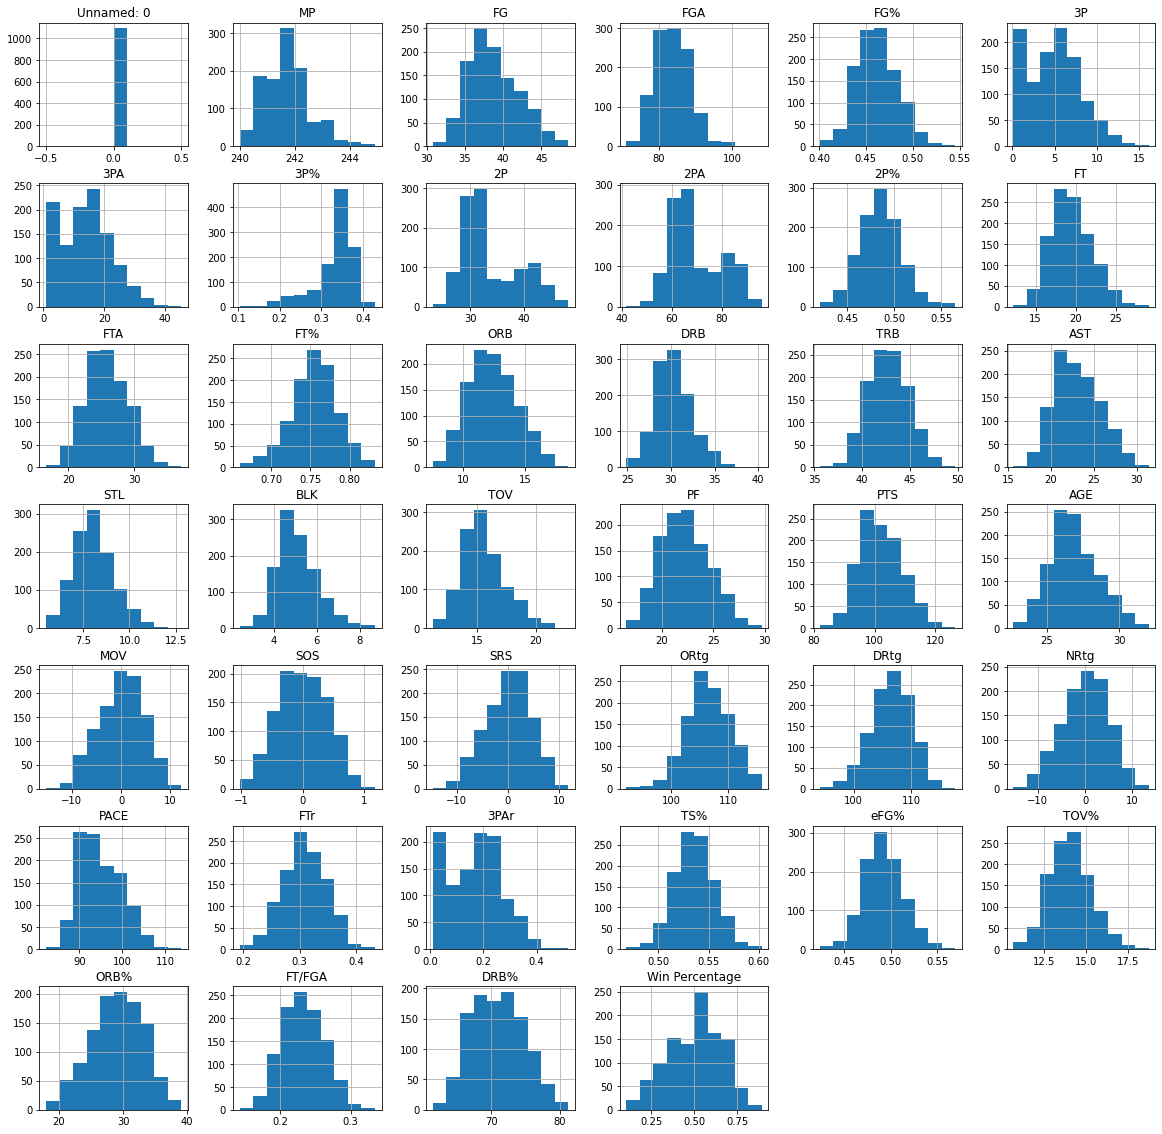

In [ ]:
df.hist(figsize = (20,20))
plt.show()

Most features seem normally distributed without any noticeable skew. However, there are some exceptions. MP (minutes played) is heavily skewed to the right. This means that most teams cluster toward a lower than average amount of minutes played each game on average, while there are a small number of teams which play more minutes. FG (field goals) and FGA (field goal attempts) are also slightly right skewed. This makes sense, because when you look at the NBA over time, teams in the newer era of the NBA over the past decade attempt and make more shots than in the past, because the league has changed from being focused on defense to being focused on offense. 


However, the most important finding from these histograms in my opinion are the distributions of 3P (three pointers), 3PA (three point attempts), and 3P# (three point percentage). It is no secret that the modern day NBA has transitioned from barely shooting any threes in its early days to a heavily increased emphasis on three pointers. 3P and 3PA are heavily skewed right because most of the years from 1980 to 2010 represented when the NBA didn't care much about threes. At the same time that these two statistics are right skewed, 3P# is skewed to the left. This shows that over its history, the majority of NBA teams from 1980 to 2019 shot barely any threes but made a large percentage, while there are a small number of teams (over the past few years) which attempt a ton of threes, but make only a small percentage.

I also want to talk about 2 pointers and 2 pointer attempts which seem to be the only bimodal features, having most points cluster around two areas. This is an interesting finding, and I cannot think of why this would be the case.

Something else that may be worth looking at is the win percentage of different teams, or trying to see how much the team/organization itself influences winning. As NBA fans, we know that certain organizations such as the Lakers and Celtics have continued success over time due to their market, brand, and management style.

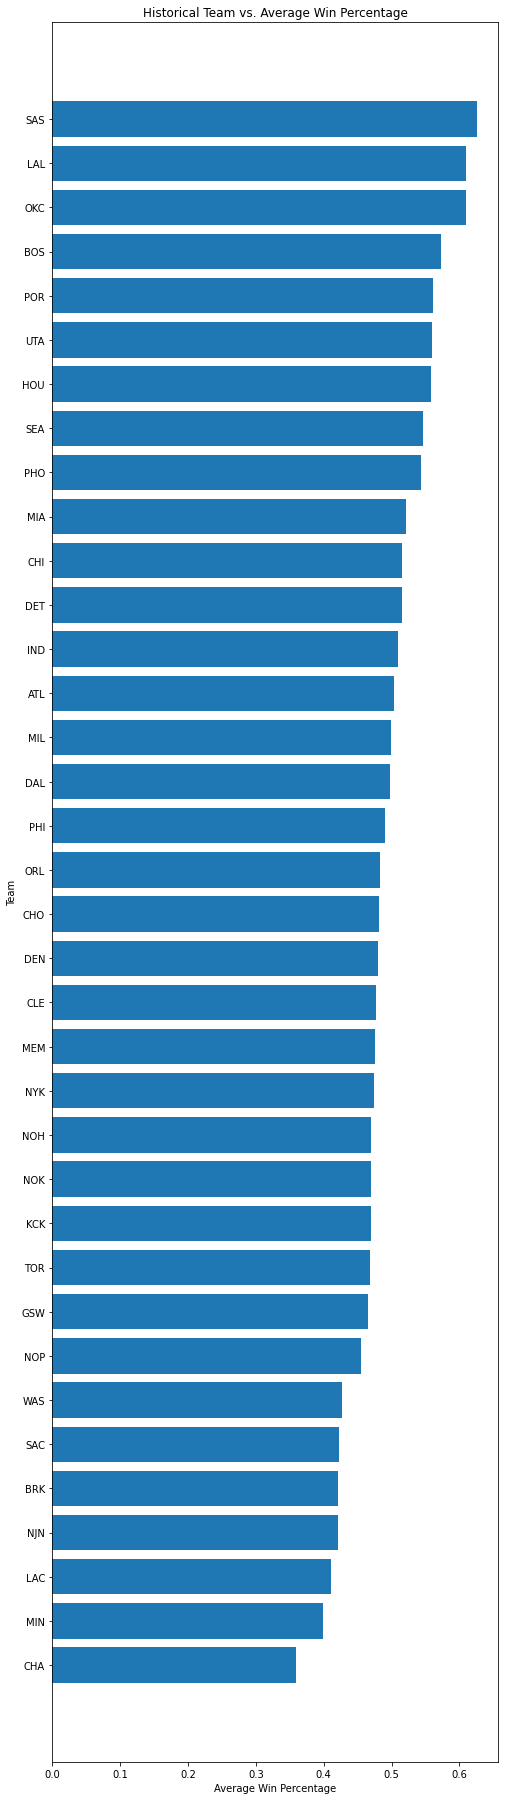

In [ ]:
# Making a new dataframe with each team and their average win percentage
df_teams = df.groupby("TEAM")["Win Percentage"].mean()
df_teams = df_teams.to_frame()
index = df_teams.index
df_teams["TEAM"] = index
df_teams = df_teams.sort_values('Win Percentage')

# making a bar graph
y_axis = df_teams["Win Percentage"]
x_axis = df_teams["TEAM"]

plt.figure(figsize=(8,32))
plt.barh(x_axis, y_axis)
plt.title('Historical Team vs. Average Win Percentage')
plt.ylabel('Team')
plt.xlabel('Average Win Percentage')
plt.show()



The winningest franchises in history are the San Antonio Spurs, Los Angeles Lakers, Boston Celtics, and Oklahoma City Thunder. It is somewhat surprising to see the Thunder on that list, because they are not a large market team. On the other end, the worst franchises in history by the numbers have been the Minnesota Timberwolves, the Charlotte Bobcats (which are now the Charlotte Hornets), and the Los Angeles Clippers. 

Next, we can look at how different team based statistics have changed over time throughout the league across every single team. There are a few trends here that I am expecting, such as the various three pointer statistics to trend upwards, and the overall field goal percentages to trend downwards over time. I am choosing to exclude a few statistics which are irrelevant.


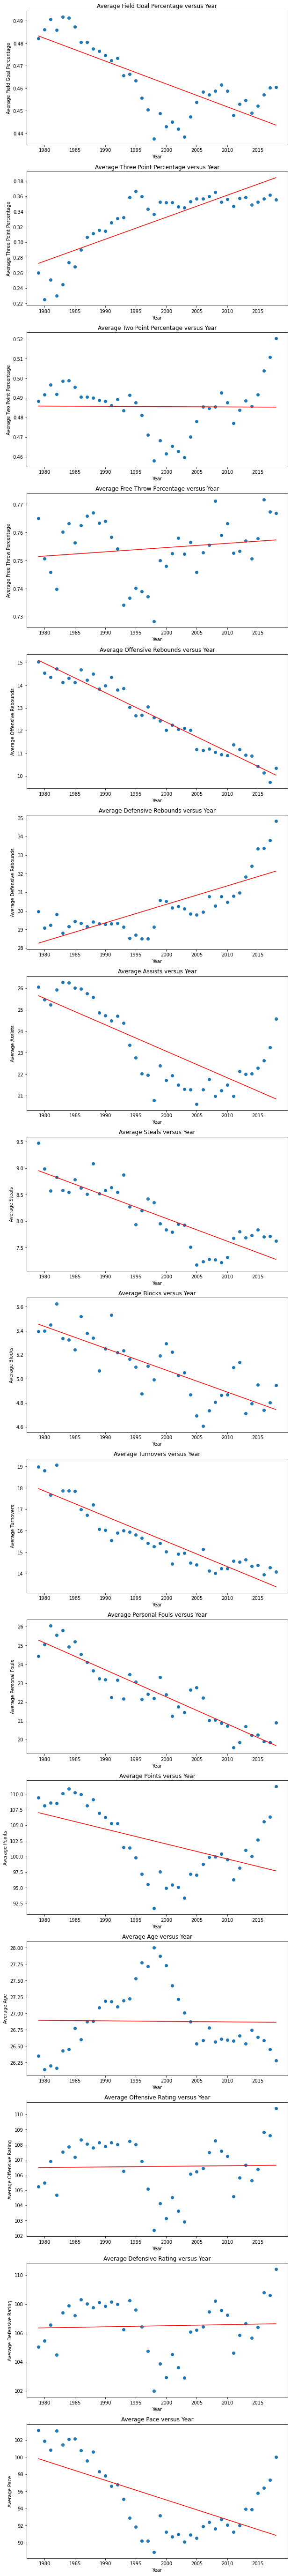

In [ ]:
from sklearn.linear_model import LinearRegression

# The year can be the first year of each season
df['year'] = df['SEASON'].astype(str).str[0:4].astype(int)
df_overtime = df

# Since we are investigating percentages, attempts and makes for every category 
# of shot can be dropped.

df_overtime = df_overtime.drop(columns = ['SEASON', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA'])

# minutes played is basically always the same so that can also be dropped.
# We can also drop some really advanced statistics that are difficult to 
# interpret, and some statistics that are really just calculations using statistics 
# that we already are plotting

df_overtime = df_overtime.drop(columns = ['MP','MOV', 'SOS', 'SRS', 'NRtg', 
                                          'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 
                                          'ORB%', 'FT/FGA', 'DRB%', 'TRB', 'Win Percentage'])

#creating subplots and relevant columns/labels
fig, axes = plt.subplots(ncols = 1, nrows = 16, squeeze = False, figsize = (10, 100))
cols = ['FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 
        'TOV', 'PF', 'PTS', 'AGE', 'ORtg', 'DRtg', 'PACE']
y_labels = ['Field Goal Percentage', 'Three Point Percentage', 'Two Point Percentage', 'Free Throw Percentage', 'Offensive Rebounds', 
            'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points', 'Age', 'Offensive Rating', 
            'Defensive Rating', 'Pace']
years = [x for x in range(1979, 2019)]
k = 0

#make subplot for each column
for column in df_overtime.columns:
    if k == len(cols): break
    stat_results = []
    #grab each stat info and add to stats
    for year in range(1979, 2019):
        stat = cols[k]
        year_stats = df_overtime[df_overtime["year"] == year]
        stat_results.append(sum(year_stats[stat]) / len(year_stats[stat]))
    #make linear regressor model and fit to the scatter plot
    linear_regressor = LinearRegression()
    linear_regressor.fit(np.array(years).reshape(-1, 1), stat_results)
    y_pred = linear_regressor.predict(np.array(years).reshape(-1, 1)) 
    #add features to the plot itself
    axes[k, 0].scatter(years, stat_results)
    axes[k, 0].plot(years, y_pred, color = 'red')
    axes[k, 0].title.set_text("Average " + y_labels[k] + " versus Year")
    axes[k, 0].set_xlabel("Year")
    axes[k, 0].set_ylabel("Average " + y_labels[k])
    k += 1




These graphs are fascinating. Here is my analysis and interpretation of the various graphs:

* Three Point Percentage: As expected, the average three point percentage over the years has a strong positive correlation which seems to have a slight parabolic shape. This article has more information about how the NBA has evolved over the years to place more emphasis on the three pointer. https://www.nba.com/news/3-point-era-nba-75

* Field Goal Percentage: The negative trend in field goal percentage is expected. However, there is a huge dip around the year of 2000. This may be attributed to the fact that the pace of the league also follows roughly the same trend with a similar dip.

* Two Point Percentage: This also follows a parabola like curve with a dip near 2000.

* Free Throw Percentage: There is no correlation.

* Offensive Rebounds: There is a very strong negative linear correlation. This is fascinating, as it seems that teams steadily grabbed less offensive rebounds every year. The only thing that I can think of which may be able to explain this is the fact that there are less dominant centers today who are strong enough to grab offensive rebounds, so the majority of rebounds become defensive rebounds.

* Defensive Rebounds: There is a positive correlation here, especially in the last few years where it has risen at a faster rate. I think this is expected, and can be explained by the lack of dominant centers in the modern NBA.

* Assists: This feature trends negatively with a parabolic shape, but is starting to increase again in the last few years. 

* Steals: This trends negatively, and this makes sense because the league has become less focused on defense.

* Blocks: This trends negatively, this makes sense for the same reason as the steals.

* Turnovers: This has a strong, negative, linear correlation. This also makes sense for the same reason as the steals and blocks. 

* Personal Fouls: There is a reasonably strong negative, linear correlation here which I am very surprised by. The officiating in the modern game has a reputation for being "soft", or calling too many fouls, so it is interesting to see that the number of fouls is actually going down from the supposedly tougher eras of the 80's and 90's.

* Points: This feature follows a parabola shaped trend, and is trending back upwards in recent years. This statistic also has a dip around the year of 2000.

* Age: This statistic follows a parabola shaped trend, but peaks around the year of 2000. This is very strange, as there seems to be no reason for the average age of the league to fluctuate much at all.

* Offensive Rating: There is a very slight positive correlation.

* Defensive Rating: There is a very slight positive correlation here as well. This is somewhat surprising, given that defenses today as a whole are widely believed to be less strong than defenses of the past.

* Pace: This statistic follows a parabola shaped trend which is maximized around the 80's and the modern day, with a dip around the year of 2000. This is interesting because today's game is very fast paced, and NBA fans do not typically think of the 80's as being a fast paced era, but the numbers suggest otherwise.


Overall, I am very perplexed about the sudden change in trends around the year of 2000, as nothing signficant that I am aware of changed in the league around that time besides the loosening of a few defensive rules. For more information on how the NBA has changed over time, I would recommend visiting https://bleacherreport.com/articles/1282804-how-the-nba-game-has-changed-over-the-last-decade.


# 4. Machine Learning


In the last section, we visualized and analyzed the data thoroughly in order to gain a deeper understanding of what we were dealing with. The next step is to use our data to build an actual machine learning model which can be used to predict a team's win percentage. Since the win percentage is continuous, I will need to use regression. The two machine learning models I am going to use are multiple linear regression (MLR) and random forest regression. 

### 4.1: Preparing the Data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# We will again drop all of the stats that factor into percentage stats that we 
# are already including, or are just calculations using statistics that we are already
# including. 
df_ML = df.drop(columns = ['SEASON', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'year'])

df_ML1 = df_ML.drop(columns = ['MP','MOV', 'SOS', 'SRS', 'NRtg', 
                                          'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 
                                          'ORB%', 'FT/FGA', 'DRB%', 'TRB'])

# The team is 
# categorical and is also not essential for our model since there are 
# much better predictors we can use. 

df_ML2 = df_ML1.drop(columns = ['TEAM'])

df_ML2.head()

# Since some of the variables are on a percentage scale, and others are not, 
# we need to normalize all of the variables on a scale from 0 to 1.

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_ML2), columns=df_ML2.columns)
df_norm = df_norm.drop(columns=df.columns[0])
df_norm.head()

,FG%,3P%,2P%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,AGE,ORtg,DRtg,PACE,Win Percentage
0,0.395833,0.626543,0.291667,0.569767,0.798165,0.535484,0.708861,0.136986,0.476190,0.482759,0.496183,0.562780,0.677419,0.464135,0.493617,0.646497,0.471254
1,0.493056,0.512346,0.402778,0.366279,0.596330,0.387097,0.670886,0.315068,0.380952,0.525862,0.496183,0.531390,0.634409,0.443038,0.365957,0.640127,0.471254
2,0.506944,0.450617,0.423611,0.651163,0.477064,0.425806,0.544304,0.315068,0.380952,0.500000,0.664122,0.484305,0.354839,0.468354,0.357447,0.544586,0.533459
3,0.465278,0.589506,0.368056,0.261628,0.532110,0.303226,0.594937,0.465753,0.396825,0.706897,0.557252,0.387892,0.333333,0.291139,0.221277,0.544586,0.517908
4,0.576389,0.456790,0.506944,0.558140,0.449541,0.270968,0.702532,0.178082,0.238095,0.560345,0.587786,0.466368,0.376344,0.506329,0.557447,0.480892,0.409048


### 4.2: Splitting the Data

Now that the data is normalized and our predictors are ready to go, we can split the data into testing and training sets. I am using a 80-20 split between training and testing. 

In [ ]:
y = df_norm['Win Percentage']
X = df_norm.drop('Win Percentage',axis=1)
X.shape, y.shape

((1093, 16), (1093,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((874, 16), (219, 16))

### 4.3 Model Building and Training



#### 4.3.1: Multiple Linear Regression

The first model I will be using is multiple linear regression. Regression models are used to describe relationships between variables by fitting a line to the observed data. Linear regression uses OLS (Ordinary Least Squares), meaning that it generates a line which minimizes the squared residuals of each data point. Multiple linear regression uses multiple (more than one) predictor in order to create this line. I will be attempting to create a model where I use a specific subset of features in my data in order to successfully predict a team's win percentage. To know more about how multiple linear regression works, visit https://www.scribbr.com/statistics/multiple-linear-regression/. 

In [ ]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Win Percentage   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     931.2
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:09:42   Log-Likelihood:                 1451.0
No. Observations:                 874   AIC:                            -2868.
Df Residuals:                     857   BIC:                            -2787.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4583      0.038     12.020      0.000       0.383       0.533
FG%            0.0545      0.035      1.546      0.123      -0.015       0.124
3P%           -0.0469      0.019     -2.460      0.014      -0.084      -0.009
2P%           -0.0578      0.044     -1.318      0.188      -0.144       0.028
FT%           -0.0202      0.013     -1.551      0.121      -0.046       0.005
ORB           -0.0195      0.024     -0.820      0.412      -0.066       0.027
DRB            0.0392      0.028      1.412      0.158      -0.015       0.094
AST           -0.0156      0.018     -0.869      0.385      -0.051       0.020
STL            0.0209      0.018      1.166      0.244      -0.014       0.056
BLK            0.0228      0.012      1.935      0.053      -0.000       0.046
TOV            0.0194      0.025      0.769      0.442      -0.030       0.069
PF            -0.0393      0.014     -2.783      0.006      -0.067      -0.012
PTS            0.3299      0.174      1.894      0.059      -0.012       0.672
AGE            0.0715      0.011      6.526      0.000       0.050       0.093
ORtg           0.7648      0.095      8.046      0.000       0.578       0.951
DRtg          -0.8519      0.020    -43.000      0.000      -0.891      -0.813
PACE          -0.2644      0.130     -2.034      0.042      -0.519      -0.009
==============================================================================
Omnibus:                        1.024   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.081
Skew:                           0.038   Prob(JB):                        0.582
Kurtosis:                       2.845   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After running a multiple linear regression model on our data, we can see
which features we can remove to make the model more accurate. Using an alpha level of .1, we can see that several of the predictors have a higher p value than .1 so they can be removed from the model. First, however, we must check for multicollinearity. 

In [ ]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,PTS,1125.58
13,ORtg,826.55
15,PACE,646.27
2,2P%,173.93
0,FG%,100.53
1,3P%,69.52
4,ORB,49.56
9,TOV,42.20
14,DRtg,40.07
5,DRB,35.70


This model has extremely high VIFs, meaning that the features are highly correlated with each other. This makes a lot of sense, because a lot of statistics in basketball are highly collinear. For example, a team that scores a lot of points will inevitably have a high offensive rating, and this is why the VIF values are extremely high. I will remove a few of the parameters with extremely high VIFs so that we do not supply redundant information to the model, and remove the parameters from my original model with a p-value above the threshold of .1. Although technically, all variables with a VIF > 5 should be removed, I cannot follow this rule because then I would have no variables left. 

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_new = X_train.drop(['ORtg'], 1,)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('ORB', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('TOV', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('AST', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('DRB', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('STL', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('2P%', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('FT%', 1)
X_train_lm = sm.add_constant(X)
X_train_new = X_train_new.drop('3P%', 1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_new).fit()

# Printing the summary of the final model
print(lr_2.summary())

                                 OLS Regression Results                                
Dep. Variable:         Win Percentage   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              3675.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:09:46   Log-Likelihood:                          786.16
No. Observations:                 874   AIC:                                     -1558.
Df Residuals:                     867   BIC:                                     -1525.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,PTS,1116.36
13,ORtg,830.37
15,PACE,641.26
2,2P%,172.73
0,FG%,97.12
1,3P%,71.44
4,ORB,49.68
9,TOV,40.73
14,DRtg,40.17
5,DRB,35.69


All of the high p values are taken care of. Although we still do have multicollinearity, this is the best we can do with this data. Next, we must check the important assumptions of linear regression to see that we have a valid model. We will plot a histogram of the error terms below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

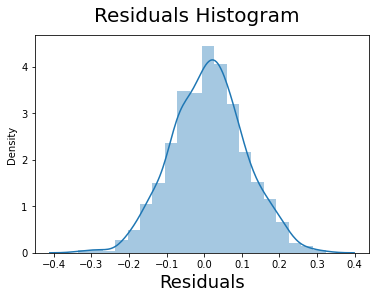

In [ ]:
import seaborn as sns
y_train_percentage = lr_2.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_percentage), bins = 20)
fig.suptitle('Residuals Histogram', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                         # X-label

The error terms closely resemble a normal distribution, so the normality of the errors is satisfied. 

In [ ]:
from sklearn.linear_model import LinearRegression
x = df_norm[['PTS', 'PACE', 'FG%', 'DRtg', 'PF', 'BLK', 'AGE']]
y = df_norm['Win Percentage']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
y_pred_mlr= mlr.predict(x_test)

# This dataframe shows what the actual test values are, and what my model predicted

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()



,Actual value,Predicted value
670,0.237983,0.295948
590,0.797832,0.757445
156,0.720075,0.628723
652,0.346843,0.394661
902,0.611216,0.576857


Now, we can evaluate the final model and actually use it to predict win percentages for teams. 

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
acc_train_lr = mlr.score(x_train, y_train)
acc_test_lr = mlr.score(x_test, y_test)
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))

R squared: 94.06
Mean Absolute Error: 0.04193332915604874
Mean Square Error: 0.0027251819444785207
Root Mean Square Error: 0.052203275227503884
Linear Regression: Accuracy on test Data: 0.932


This is a great model, as the errors are minimal and the R-squared is high. The r-squared value for the final linear model on the training data was .941, and the r-squared on the testing data is .940 (from the OLS summary above), which is almost equal. Therefore, this model is a great fit. The accuracy on the test data is also very high, at .932. It is able to accurately predict the win percentage of an NBA team.

#### 4.3.2: Random Forest Regression

The next model we are using is Random Forest Regression, which is based on decision trees, a very powerful tool in machine learning. Decision trees are a type of supervised machine learning algorithm where you feed in some input, and the data is continuously passed into nodes of a tree which make one decision or another until a final answer is arrived to at the end. Random forests utilize multiple decision trees, and output the mean output of all the trees as the output of the algorithm. If you want to learn more about how random forests work in regression problems, I would recommend visiting the link below: 
https://levelup.gitconnected.com/random-forest-regression-209c0f354c84



In [ ]:
# Setting the X and y for the regression

X = df_norm.iloc[:, :-1]
y = df_norm.iloc[:, -1]

# Creating and fitting the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

Now, we can evaluate the model.  

In [ ]:
#predicting the target value from the model for the samples
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)

#computing the accuracy of the model performance
acc_train_rf = rf.score(X_train, y_train)
acc_test_rf = rf.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
#computing root mean squared error (RMSE)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_rf))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_rf))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_rf))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_rf)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_rf)

Linear Regression: Accuracy on training Data: 0.990
Linear Regression: Accuracy on test Data: 0.927

Linear Regression: The RMSE of the training set is: 0.02013426648793343
Linear Regression: The RMSE of the testing set is: 0.05087256485275779


The model also has a great accuracy when used to predict the testing data, at .927. The root mean squared error, which is generally the best metric to use to evaluate how much error the model has, is very minimal for the training set at .0509. The closer this number is to 0, the better the model, due to the fact that the errors are minimized. However, we are not done yet because our accuracy, .927 is slightly lower than our previous model. We can improve upon our model by tuning the hyperparameters.

In [ ]:
# We can first increase the number of trees to 200. The more trees there are,
# the more accurate the model will be since there are more trees to average 
# out. 

# We will also change n_jobs to -1, to remove any restrictions on the number 
# processors that the model is allowed to use.

# We will make the max depth 32 to make the trees have more splits and 
# capture more data


rf_improved = RandomForestRegressor(n_estimators=400, n_jobs= -1, max_depth=32)
rf_improved.fit(X_train, y_train)


RandomForestRegressor(max_depth=32, n_estimators=400, n_jobs=-1)

We can now evaluate the improved model.

In [ ]:
#predicting the target value from the model for the samples
y_test_rf_improved = rf_improved.predict(X_test)
y_train_rf_improved = rf_improved.predict(X_train)

#computing the accuracy of the model performance
acc_train_rf_improved = rf_improved.score(X_train, y_train)
acc_test_rf_improved = rf_improved.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
#computing root mean squared error (RMSE)
rmse_train_rf_improved = np.sqrt(mean_squared_error(y_train, y_train_rf_improved))
rmse_test_rf_improved = np.sqrt(mean_squared_error(y_test, y_test_rf_improved))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_rf_improved))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_rf_improved))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_rf_improved)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_rf_improved)

Linear Regression: Accuracy on training Data: 0.990
Linear Regression: Accuracy on test Data: 0.928

Linear Regression: The RMSE of the training set is: 0.01937532935134395
Linear Regression: The RMSE of the testing set is: 0.050801024960462605


After tuning our parameters, we were able to increase our accuracy by .001. Although this is not a significant improvement, it is still improved by a little. Our random forest regression model is also able to accurately predict an NBA team's win percentage. 

# 5. Conclusion

### 5.1: Additional Links

We covered a lot of ground in this tutorial, and I have attached some more links for anyone who wants to continue working with data science/machine learning or NBA data analytics.

* Other Regression Models:
    * https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
    * http://www.sthda.com/english/wiki/regression-analysis-essentials-for-machine-learning

* NBA Analytics
  * https://digital.hbs.edu/platform-digit/submission/how-data-analytics-is-revolutionizing-the-nba/
  * https://bleacherreport.com/articles/1813902-advanced-nba-stats-for-dummies-how-to-understand-the-new-hoops-math
  * https://github.com/danchyy/Basketball_Analytics


### 5.2: Tutorial Recap

In this tutorial, we set out to analyze a large set of NBA team data and attempt to create our own model to predict the win percentage of an NBA team. I first scraped the data using my own scraper, and cleaned the data to remove any irrelevant columns and prepare the data for analysis. We then engaged in exploratory data analysis, looking for relationships between the features. Through a correlation heatmap, we found that some features were very highly correlated with win percentage while others were not. We then looked at the distributions of each individual feature through histograms. These distributions gave us important clues about what our model would eventually include as predictors. We then looked at how the team itself could impact winning, and found a slight correlation there as well. Lastly, we analyzed how some important features changed throughout time to see if the time period had an important effect on the statistics that teams were putting up. At the end, we incorporated machine learning and created, refined, and evaluated two models: multiple linear regression and random forest regression. We found that the linear regression model was slightly more accurate, at .932. 


For further future analyses, we could analyze the more advanced stats which we excluded such as net rating and SRS, to see whether or not these more refined advanced stats could more accurately predict the team's win percentage. We could also incorporate the trend over time for different statistics that we analyzed during our visualization step, and include this in the model so that the model also takes into account how the team statitics are changing over time. If we were to do this, it would be able to take the power of our model to a whole new level: not only would we be using our predictors, but we would account for the change in team statistics over time. 

I hope you enjoyed reading this, and learned a thing or two about NBA analytics!

-Suhas